In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('Data/StrokeDataset.csv')

In [9]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
df.groupby('gender')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2897.0,29.065758,8.110783,10.3,23.4,27.8,33.5,78.0
Male,2011.0,28.647936,7.464493,11.5,24.0,28.4,32.5,97.6
Other,1.0,22.400000,NaN,22.4,22.4,22.4,22.4,22.4


In [20]:
df.groupby('gender')['avg_glucose_level'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2994.0,104.057809,43.590651,55.12,76.4325,90.755,112.1825,267.76
Male,2115.0,109.088520,47.434840,55.22,78.3700,93.550,117.7300,271.74
Other,1.0,143.330000,NaN,143.33,143.3300,143.330,143.3300,143.33


In [55]:
df.groupby('gender')['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       1229
        Unknown             836
        formerly smoked     477
        smokes              452
Male    Unknown             708
        never smoked        663
        formerly smoked     407
        smokes              337
Other   formerly smoked       1
Name: count, dtype: int64

In [69]:
df.groupby('gender')['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: count, dtype: int64

In [18]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [26]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [28]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
health = df.copy()

#### Enconded

In [37]:
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
oe = OrdinalEncoder()
health[categorical_cols] = oe.fit_transform(health[categorical_cols])

In [43]:
health.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.0,2.0,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,56669,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1
6,53882,1.0,74.0,1,1,1.0,2.0,0.0,70.09,27.4,2.0,1
7,10434,0.0,69.0,0,0,0.0,2.0,1.0,94.39,22.8,2.0,1
8,27419,0.0,59.0,0,0,1.0,2.0,0.0,76.15,28.0,0.0,1
9,60491,0.0,78.0,0,0,1.0,2.0,1.0,58.57,24.2,0.0,1


In [45]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float64
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   float64
 6   work_type          5110 non-null   float64
 7   Residence_type     5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   float64
 11  stroke             5110 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 479.2 KB


In [47]:
health['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [49]:
health['smoking_status'].value_counts()

smoking_status
2.0    1892
0.0    1544
1.0     885
3.0     789
Name: count, dtype: int64

In [71]:
from sklearn.utils import resample

In [73]:
df_major = health[(health['stroke'] == 0)]   # Majority class (no stroke)
df_minor = health[(health['stroke'] == 1)]   # Minority class (stroke)

df_minor_resmapled = resample(
    df_minor,
    replace=True,          # Sample with replacement (bootstrap sampling)
    n_samples=4861,        # Make minority class size equal to majority (here 4861 rows)
    random_state=42        # Fix randomness for reproducibility
)

df_resampled = pd.concat([df_minor_resmapled, df_major])  # Combine into balanced dataset

#### When you use upsampling with resample(..., replace=True), you’re not creating brand-new “fake” data in the sense of inventing new features. So what’s actually happening is:

#### You take the existing minority-class rows (stroke = 1).

#### You randomly pick rows from that group, allowing duplicates (replace=True).

#### You add these duplicated rows to the dataset until the minority class matches the majority class size.

#### So technically, you’re duplicating real data points rather than generating new synthetic ones. It’s a standard technique to balance datasets for machine learning so the model doesn’t just always predict the majority class.

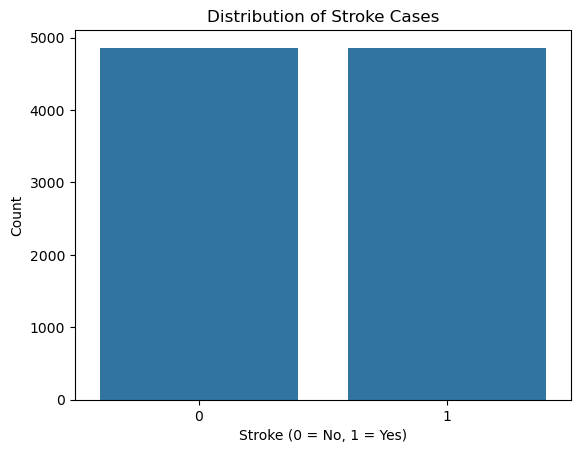

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df_resampled)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### Creates a bar plot to check that the resampling worked. Roughly equal counts of 0 (no stroke) and 1 (stroke).
#### Creates a heatmap of correlations between all numeric features in the resampled dataset.
#### Darker/brighter colors = stronger positive/negative correlation.
#### Explores relationships between variables using a correlation heatmap.
#### Age, hypertension, heart disease, glucose level stand out as potentially useful predictors.
#### Variables like residence type or gender don’t show much linear correlation with stroke.

<Axes: >

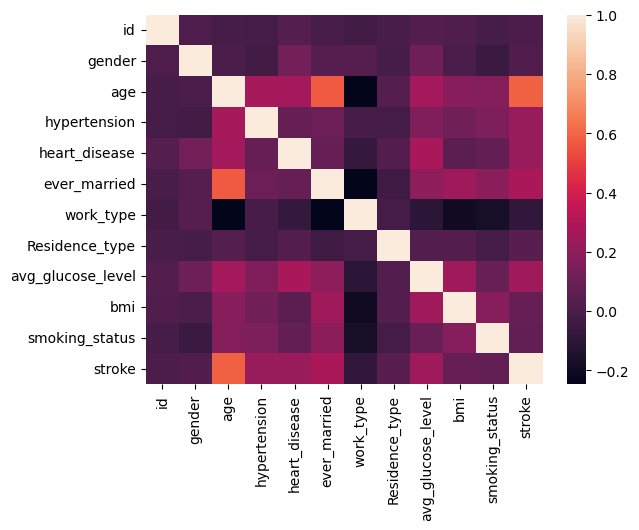

In [67]:
sns.heatmap(df_resampled.corr(), fmt='.2g')

C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

Cross-validation results saved to 'xgboost_cv_results.csv'
Patients predicted to have stroke saved to 'patients_predicted_stroke.csv'

=== Cross-Validated Accuracy ===
Mean Accuracy: 0.8403621187597194
Standard Deviation: 0.002068239319277195


<Figure size 800x600 with 0 Axes>

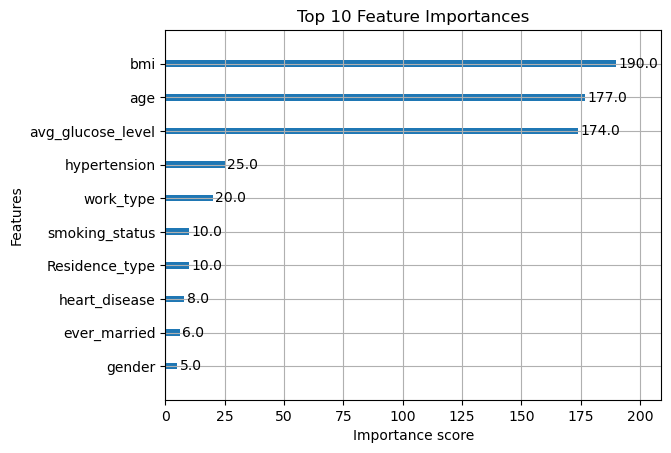

In [93]:
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ------------------------------
# Features, target, and ID
# ------------------------------
ids = df_resampled['id']                     # Keep IDs for output
X = df_resampled.drop(['stroke', 'id'], axis=1)  # Features only
y = df_resampled['stroke']

# ------------------------------
# Initialize XGBoost model
# ------------------------------
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# ------------------------------
# Stratified K-Fold Cross-Validation
# ------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []            # To store fold metrics
all_predictions = []    # To store patient-level predictions
accuracy_list = []
fold = 1

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy and metrics
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store fold metrics
    results.append({
        'Fold': fold,
        'Accuracy': acc,
        'Precision_NoStroke': report['0']['precision'],
        'Recall_NoStroke': report['0']['recall'],
        'F1_NoStroke': report['0']['f1-score'],
        'Precision_Stroke': report['1']['precision'],
        'Recall_Stroke': report['1']['recall'],
        'F1_Stroke': report['1']['f1-score'],
        'TN': cm[0,0],
        'FP': cm[0,1],
        'FN': cm[1,0],
        'TP': cm[1,1]
    })
    
    # Store patient-level predictions with ID
    fold_predictions = X_test.copy()
    fold_predictions['id'] = df_resampled.iloc[test_idx]['id'].values
    fold_predictions['stroke_true'] = y_test.values
    fold_predictions['stroke_pred'] = y_pred
    all_predictions.append(fold_predictions)
    
    fold += 1

# --------------------------
# Save cross-validation metrics
# ------------------------------
results_df = pd.DataFrame(results)

# Round to 2 decimal places
results_df = results_df.round(2)

results_df.to_csv('Data/xgboost_cv_results.csv', index=False)
print("Cross-validation results saved to 'xgboost_cv_results.csv'")

# ------------------------------
# Combine all patient predictions
# ------------------------------
all_predictions_df = pd.concat(all_predictions)

# Filter patients predicted as stroke
stroke_predictions_df = all_predictions_df[all_predictions_df['stroke_pred'] == 1]

# Save to CSV
stroke_predictions_df.to_csv('Data/patients_predicted_stroke.csv', index=False)
print("Patients predicted to have stroke saved to 'patients_predicted_stroke.csv'")

# ------------------------------
# Cross-validated summary
# ------------------------------
print("\n=== Cross-Validated Accuracy ===")
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation:", np.std(accuracy_list))

# ------------------------------
# Feature importance (optional)
# ------------------------------
plt.figure(figsize=(8,6))
plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()